# MongoDB Tutorial: N MongoDB Query Patterns Everybody Must Know

## H2: What is MongoDB and why should you care?

You've probably heard or even worked with relational databases. The row-table format is the most popular and intuitive structure to store information. But unfortunately, you can't store all data that comes you way in rows and tables. In fact, there are so many problems in the real-world that require non-relational databases. So, are there alternatives? 

The answer is YES! There are four types of databases that don't have any rows or tables. They are called NoSQL databases as you can't use SQL to query them. They are:

- Key-value databases
- Document databases
- Column family databases
- Graph databases

This article focuses on document databases and how to work with them using a server called MongoDB. But before we jump into the technical details, let's look at the use-cases of document databases. 

## H2: When to use document databases?

One of the main use-cases for choosing document databases is when you have data that doesn't neatly fit into a pre-defined schema like a table. There are many processes or applications in industries that store these types of data. Here are some examples:

- __Web and mobile apps__: User profiles, preferences, content and interactions
- __Content management systems__: Storing a wider range of media such as text, images, video, GIFs, etc.
- __E-commerce platforms__: Product catalogs, customer information, order history, inventory, etc.
- __Gaming__: storing player profiles, leaderboard rankings
- __Logging and data collection__: large volumes of logs, events and metrics for analysis and so on.

Take a moment to think about how data collected from these industries would fit into tables. For example, e-commerce platforms would have a hard time storing product catalogs into a pre-defined schema. Different products have different attributes or worse, different number of attributes. Do you need 10 columns to store 10 physical attributes of drones of 100 different brands or just 5-6 to store book information? 

Table-based databases can't help you in such scenarios. By using document databases such as MongoDB, you gain the following benefits:

- No upfront development cost to design a schema
- Documents (data) can vary over time (including the data types, the number of attributes, etc.)
- Document databases avoid joins which results in much faster querying
- Intuitive for developers as document databases are mostly large JSON files, which are basically, humongous dictionaries for Pythonistas.
- Document DBs scale horizontally, which means they don't need increasingly more compute resources as database grows. 

Now, let's take a look at the core concepts around document databases and MongoDB.

## H2: Core concepts around MongoDB

I've been saying document databases over and over up to this point, but what actually are they? Here are the main ideas:

- __Documents__: data is stored in objects called documents. In simple terms, documents are similar to JSON key-value objects. A single document is equivalent to a row in a table. If you are a Python programmer, you can think of a document as a dictionary and you would be OK. Just remember that documents can have nested documents, which is one of the main features of document databases
- __Collections__: collections are like tables in relational databases but instead of containing rows, they contain, you guessed it, documents. Collections are massive data structures that may contain thousands or millions of dictionaries. 
- __Schema-less__: Here is where it gets interesting. A collection can have documents with varying sizes. For example, document 1 can have 10 key-value pairs while document 2 can have 15 (as long as the information is about the same category/topic like products for the collection to make sense).

Here is a great table summarizing the differences between relational databases and document databases:

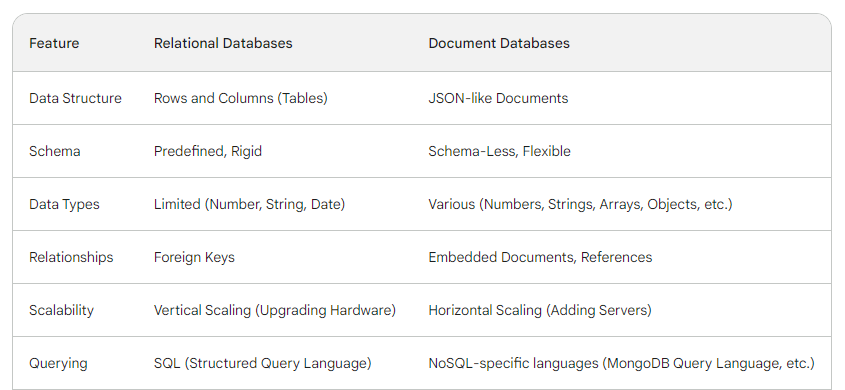

Let's actually start working with document databases.

## H2: MongoDB setup: connecting to data sources

To query document databases, we need to install the MongoDB server. Here are the platform-specific instructions:

- For Windows, follow the instructions on this [link](https://www.mongodb.com/docs/manual/tutorial/install-mongodb-on-windows/).
- For Unix-like systems, you can install MongoDB from the terminal:

```shell
$ sudo apt-get install -y mongodb
```

Then, inside a virtual environment, install the libraries `pymongo` and `requests`. `pymongo` is the official Python adapter for the MongoDB server. We will need the `requests` library to pull data from an API. 

```shell
$ pip install pymongo
$ pip install requests
```

Then, from the terminal, start the MongoDB server with the following command:

```
$ sudo service mongodb start
```

Now, we are ready to load some data into a document database. There are two scenarios when doing so:

1. You have data locally in some appropriate format like JSON, BSON, YAML or XML. 
2. You need to pull the data from external sources, typically APIs.

We will cover both. First, let's load a collection named `drone_races.json` locally. Here is the snippet to do so:

In [1]:
import json

from pymongo import MongoClient

# Establish connection to MongoDB
client = MongoClient("localhost", 27017)
# Create a database named "drones"
drones = client["drones"]
# Create a collection named "races"
races = drones["races"]

# Load dataset into MongoDB
with open("data/drone_races.json", "r") as file:
    data = json.load(file)
    races.insert_many(data)

> Pro tip: Use the "Explain code" button to get a line-by-line explanation of the code. 

The two most important objects for us are `drones` (a database) and `races` (a collection). Most of the functions and methods will be related to collections. Database objects are mostly used for managing collections. 

Now, let's see how to load the same data using an API. I've stored the information as an API using a service called [Mockaroo](https://www.mockaroo.com/). Here is the snippet:

In [1]:
import requests
from pymongo import MongoClient

# Fetch data from the API
api_url = (
    "https://my.api.mockaroo.com/drone_race_matches.json?key=6f5a6b50"
)
response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()  # Get the JSON data from the API

    # Establish a connection to MongoDB
    client = MongoClient()

    # Access or create a specific database
    drones = client["drones"]

    # Access or create a specific collection within the database
    races = drones["races"]

    # Insert the fetched data into the MongoDB collection
    races.insert_many(data)
else:
    print("Failed to fetch data from the API.")

We've loaded some data into the `races` collection of the `drones` document database, or did we? Let's check by using queries!

## H2: Elementary queries

### H3: Counting documents in MongoDB

To find out if any data exists in a collection, we need to count the documents inside. We will use `count_documents` method to do so:

In [2]:
races.count_documents({})

9040

> Notice the empty dictionary passed to `count_documents`. That dictionary is called a filter in MongoDB. As we go through the tutorial, we will learn how to fill the dictionary to create different kinds of filters. Right now, we have no filter. The above code is the same as `SELECT COUNT(*) FROM table_name` in SQL.

We've got 9040 documents - yay! Now, let's look at some data.

### H3: Extracting one document in MongoDB

To look at one document with `pymongo`, we can use the `find_one` method:

In [3]:
from pprint import pprint

pprint(races.find_one())

{'_id': ObjectId('659d31e9255ec0cf4bab529d'),
 'laps': 3,
 'league': 'F1 Drones',
 'location': {'city': 'Ford',
              'country': 'United Kingdom',
              'date': 'error: invalid date "2024-10-25"',
              'venue': 'Manhattan Seas'},
 'name': 'Honorable',
 'pilots': {'drone': 'DJI3-old',
            'finishing_position': 66,
            'name': 'Kariotta Cow',
            'qualification_time': 27.39,
            'team': 'Sky Crusaders',
            'telemetry': {'altitude': 34.3,
                          'battery_voltage': 12.1,
                          'speed': 68.3,
                          'timestamp': 'error: invalid date '
                                       '"2024-10-25T14:09:26Z"'}},
 'sponsors': ['Fat Shark', 'DJI', 'Etisalat'],
 'weather_conditions': 'snowy'}


Take note of the fields (keys) of this document. It stores information about a single drone race and includes information such as:
- The number of laps
- Weather conditions at the time of the match
- The pilots (not all of them) during the match
- Match sponsors and so on.

The document also has a required `_id` field, which is a unique hash. 

### H3: Selecting all documents in MongoDB

`count_documents` always returns a number but sometimes, we want to look at the data our query matches. To do so, we can use the big brother of `find_one`, which is `find`:

In [7]:
from pprint import pprint

for race in races.find():
    pprint(race)
    break

{'_id': ObjectId('659d31e9255ec0cf4bab529d'),
 'laps': 3,
 'league': 'F1 Drones',
 'location': {'city': 'Ford',
              'country': 'United Kingdom',
              'date': 'error: invalid date "2024-10-25"',
              'venue': 'Manhattan Seas'},
 'name': 'Honorable',
 'pilots': {'drone': 'DJI3-old',
            'finishing_position': 66,
            'name': 'Kariotta Cow',
            'qualification_time': 27.39,
            'team': 'Sky Crusaders',
            'telemetry': {'altitude': 34.3,
                          'battery_voltage': 12.1,
                          'speed': 68.3,
                          'timestamp': 'error: invalid date '
                                       '"2024-10-25T14:09:26Z"'}},
 'sponsors': ['Fat Shark', 'DJI', 'Etisalat'],
 'weather_conditions': 'snowy'}


`find` with an empty query (no arguments) returns documents one-by-one but that's not what we want! We want to perform queries so that we can answer interesting questions about our data. This is where filter documents will prove useful.

### H3: Selecting based on a condition in MongoDB

Let's start with the simplest of filters - matching documents where some field is equal to some value. This would be the same as:

```
SELECT * 
  FROM table_name
 WHERE field = value
```

Let's do it in MongoDB:

In [4]:
criteria = {"sponsors": "Fat Shark"}

fat_shark_races = races.count_documents(criteria)
fat_shark_races

6194

Above, we are choosing the races that had Fat Shark as their sponsors. The syntax is simply a dictionary that maps `sponsors` field to `Fat Shark`. 

MongoDB query language wouldn't be a language if it didn't have some common inequality operators. Here is how to use the "less than" operator:

In [5]:
criteria = {"pilots.qualification_time": {"$lt": 10}}

quick_races = races.count_documents(criteria)
quick_races

3061

The above query introduces four new features of the MongoDB query language (MQL):
- You can access sub-fields with dot notation. `pilots.qualification_time` extracts the nested qualification time within pilots fields. 
- Almost all operators in MQL start with a dollar sign.
- Operators are used in a nested document like above.
- The `$lt` is for the "less than" operator. 

So, the result of this query tells us that there were 3061 matches where one pilot had less than 10 seconds of qualification time. This query was possible with the `$lt` operator. Here are its brothers and sisters:

- `$lte`: less than or equal
- `$gt`: greater than
- `$gte`: greater than or equal.

They have the same syntax as `$lt`.

### H3: Selecting with logical conditional operators in MongoDB

MQL also includes logical conditional operators such as `$and` and `$or`. Let's start with the latter.

We will retrieve races with either United Kingdom as the location or Etisalat as the sponsor:

In [7]:
criteria = {
    "$or": [
        {"location.country": "United Kingdom"},
        {"sponsors": "Etisalat"},
    ]
}
races.count_documents(criteria)

6223

> Again, use the `Explain code` button for a detailed explanation.

There are 6223 documents matching our criteria. To use an `OR` logic for multiple values for the same field, we can use the `$in` operator. 

For example, we can check for bad weather conditions the following way:

In [9]:
criteria = {
    "weather_conditions": {"$in": ["rainy", "snowy", "cloudy"]}
}

races.count_documents(criteria)

5508

This query would have been a pain to write with the `$or` operator. Now, onto `$and`.

This time, we want to find the races with Australia as the location AND Fat Shark as the sponsor. Here is how we can do it with `$and`:

In [12]:
criteria = {
    "$and": [
        {"location.country": "Australia"},
        {"sponsors": "Fat Shark"},
    ]
}
races.count_documents(criteria)

193

But in practice, you will rarely use `$and` as it can be implemented in a much simpler way:

In [13]:
criteria = {
    "location.country": "Australia",
    "sponsors": "Fat Shark",
}

races.count_documents(criteria)

193

Just add more key-value pairs to the filter document to achieve the AND logical operator. 

Finally, there is `$nin` operator, which checks for non-membership. For example, we can return all matches that wasn't held in either United States or United Kingdom or Australia:

In [14]:
criteria = {
    "location.country": {
        "$nin": ["United States", "United Kingdom", "Australia"]
    }
}

races.count_documents(criteria)

126

This only leaves United Arab Emirates as the country, so the above query could actually be written as:

In [15]:
criteria = {"location.country": "United Arab Emirates"}

races.count_documents(criteria)

126

But, you get the idea.

## H2: Querying for null or missing values in MongoDB

Checking for null or missing values is a universal operation in all data analysis tasks. As such, there is an operator for that in MongoDB - `$exists`. Here are two examples that checks whether a certain field exists:

In [16]:
criteria = {"location.district": {"$exists": True}}

races.count_documents(criteria)

0

Hmm, turns out the `district` field doesn't exist in any of the documents. But, the laps field - that must exist in all documents as it is a key piece of information about races.

In [17]:
criteria = {"laps": {"$exists": True}}

races.count_documents(criteria)

9040

As expected, all documents have the `laps` field. But, what about fields that exist but have null value? We can check that too:

In [31]:
criteria = {"pilots.finishing_position": None}

races.count_documents(criteria)

0

By using the built-in `None` object in Python, we can check any field's value for missingness. 

There are some advanced scenarios that require null or existence checks, as well. For example, you may want to check whether certain elements of some massive nested arrays exist. 

To do this, we can use array indexing syntax in MQL. For instance, to find the races with only one sponsor, we need to check whether the second element of the `sponsors` array exists:

In [18]:
# Counting starts with 0 as always
criteria = {"sponsors.1": {"$exists": False}}

races.count_documents(criteria)

2929

And it is as easy as appending the index number of the element to they key. So, in our collection, almost 3000 races were sponsored by only one entity. 

This array indexing syntax works for many other operators, not just `$exists`. 

## H2: Projections, aka restricting fields

One last thing we are going to cover in the tutorial is projections. Up until this point, our query results included every single field in each document. This is not ideal when your documents have hundreds of fields. Imagine the eye-sore of outputs when you print them!

So, to choose the fields we want returned, we can use _projections_. Here is how:

```python
criteria = {"pilots.telemetry.speed": {"$gte": 20}}
projection = {
    "sponsors": 1,
    "location.country": 1,
    "pilots.telemetry.speed": 1,
    "pilots.name": 1,
}

fast_pilots = races.find(criteria, projection)

for pilot in fast_pilots:
    pprint(pilot)
    break
```

In the above case, we are writing our filter criteria as usual but this time, we are defining another document with four fields set to 1. If we pass this `projection` document as the second argument to `find` or `count_documents`, we will only get the fields set to 1 in the output.

```
{'_id': ObjectId('659d31e9255ec0cf4bab529d'),
 'location': {'country': 'United Kingdom'},
 'pilots': {'name': 'Kariotta Cow', 'telemetry': {'speed': 68.3}},
 'sponsors': ['Fat Shark', 'DJI', 'Etisalat']}
```

Even though we chose only four fields, the pesky `_id` field got squeezed in somehow. To suppress this behavior, set it to 0 in the `projection` dictionary:

In [19]:
criteria = {"pilots.telemetry.speed": {"$gte": 20}}
projection = {
    "sponsors": 1,
    "location.country": 1,
    "pilots.telemetry.speed": 1,
    "pilots.name": 1,
    "_id": 0,
}

fast_pilots = races.find(criteria, projection)

for pilot in fast_pilots:
    pprint(pilot)
    break

{'location': {'country': 'United Kingdom'},
 'pilots': {'name': 'Kariotta Cow', 'telemetry': {'speed': 68.3}},
 'sponsors': ['Fat Shark', 'DJI', 'Etisalat']}


Now, this is prettier.

Finally, to return all but a few fields, we can the,fields to 0:

In [44]:
projection = {"_id": 0, "league": 0, "pilots": 0}

# Empty criteria for this one
races.find_one({}, projection)

{'name': 'Honorable',
 'location': {'venue': 'Manhattan Seas',
  'city': 'Ford',
  'country': 'United Kingdom',
  'date': 'error: invalid date "2024-10-25"'},
 'sponsors': ['Fat Shark', 'DJI', 'Etisalat'],
 'laps': 3,
 'weather_conditions': 'snowy'}

As you can see, this time, we have all the fields but `_id`, `league`, and `pilots`. 

## Conclusion

This tutorial doesn't do justice to the massive size of MongoDB as a database management tool. Today, we only covered GET queries (queries to retrieve information) but MongoDB also allows data specialists to insert, update or delete information in document databases. We've also left out a whole class of queries - aggregations. 

All these topics are beyond the scope of the article and requires additional resources to learn them. Why don't you check these out:

- [Introduction to using MongoDB in data science with Python course](https://www.datacamp.com/courses/introduction-to-using-mongodb-for-data-science-with-python) - a comprehensive course that also covers advanced queries like aggregations
- [Intro to MongoDB in Python](https://www.datacamp.com/tutorial/introduction-mongodb-python) - Another MongoDB tutorial that covers CRUD (create, read, update and delete) operations with `pymongo`.
- [NoSQL concepts course](https://www.datacamp.com/courses/nosql-concepts) - if you got interested in NoSQL databases, this course is for you. Apart from document databases, it covers other non-relational databases. 
- [MongoDB University](https://learn.mongodb.com/) - Official MongoDB courses on MongoDB enterprise solutions such as Atlas.

Thank you for reading!